### Student Details

Student Name: Cathaoir Agnew

Student ID: 16171659

# Task 1 

## Uniform & Discrete Experiment

My first experiment will roll a dice. A gamble is placed depending on the result of the dice. <br>
This result of a dice roll is a uniform distribution, as all dice outcomes are equally likely; 1/6 probablility  <br>
The result is discrete as the result of a dice throw can only take on values of: 1,2,3,4,5,6

 - if dice = 1,2,3  will lose -1 
 - if dice = 4      will draw, 0
 - if dice = 5      will win,  1
 - if dice = 6      will win,  2
 
We know this is a fair game theoritically, but what will the simulations show?  <br>

The idea was to simulate 1000 dice results and record both the result of the dice, and the result of the gamble. <br>
To then calculate the expected value & standard deviation of both the result of the dice and the result of the gamble. <br>

Finally plotting the frequency of the dice rolls & plotting the frequency of the gamble result. 

Average value of dice roll 3.506
Average gamble result: 0.01
Std of dice roll: 1.7204545910892366
Std of gamble result: 1.1661475035346025


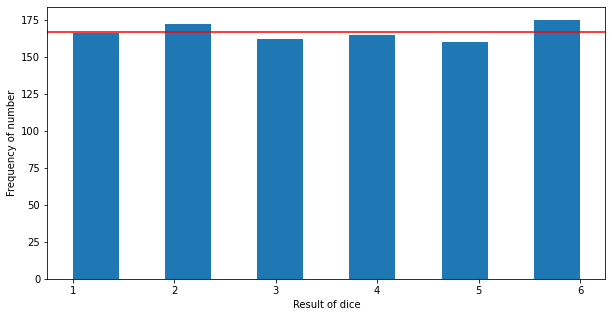

In [1]:
# import libraries 
import random 
import matplotlib.pyplot as plt 

# set a random seed
random.seed(42)

# going to roll the dice 1000 times
num_of_rolls = 1000

list_result = []
gamble_result = []

# random module random actually produces a uniform distribution as default
# this is discussed in sorcratica video: Python Random Number Generator

# going to roll the dice 1000 times  
for i in range(num_of_rolls):
    gamble = 0
    #simulating 1st roll of dice 
    result = random.randint(1, 6)
    
    #check to see what result of dice is, if 3 or below, lose money
    if result <= 3:
        gamble -= 1
    #check to see what result of dice is, if 4, its a draw, no change, ie 0
    if result == 4:
        gamble = gamble
    #check to see what result of dice is, if 5, win +1 money    
    elif result == 5:
        gamble +=1
    #check to see what result of dice is, if 6, win +2 money    
    elif result == 6:
        gamble +=2
        
    # adding the result of the individual dice throw to a list 
    list_result.append(result)
    # adding the result of the gamble for the individual game
    gamble_result.append(gamble)

        
# this is for calculating the frequency/average result of the dice rolls 
experiment_result = 0

# this is for calculating the frequency/average result of the gamble result
experiment_gamble_result = 0

# loop through each result from the dice throw
for result in list_result:
    # summing up the entire results, so then can calcualte the mean result (i.e expected outcome) 
    experiment_result += result
    
# loop through each result from the gamble result
for gam_result in gamble_result:
    # summing up the entire results, so then can calcualte the mean result (i.e expected outcome) 
    experiment_gamble_result += gam_result

    
# expected value of a dice roll is just mean of possible outcomes =  ( 1+2+3+4+5+6 / 6 ) = 3.5
avg_result = experiment_result / len(list_result) 
print("Average value of dice roll" , avg_result)

# expected value of a game is just the gamble outcomes * probabilty of outcome =  -1*(3/6) + 1(1/6) + 2(1/6) = 0 
avg_gamble_result = experiment_gamble_result / len(gamble_result) 
print("Average gamble result:" , avg_gamble_result)


# this is for calculating std . dev of dice throw 
x_subtract_mu_squared = 0
# this is for calculating std . dev of gamble result
x_subtract_gamble_mu_squared = 0

# this is for calculating part of std . dev of dice throw 
for result in list_result:
    x_subtract_mu_squared += (result - avg_result)**2
    
# this is for calculating part of std . dev of gamble result   
for gam_result in gamble_result:
    x_subtract_gamble_mu_squared += (gam_result - avg_gamble_result)**2

# calculating std dev of dice throw 
std_dev = ( (x_subtract_mu_squared /len(list_result) ) **(1/2))

# calculating std dev of gamble result
std_dev_gamble = ( (x_subtract_gamble_mu_squared /len(gamble_result) ) **(1/2))

print("Std of dice roll:", std_dev)

print("Std of gamble result:", std_dev_gamble)

# plot of distribution of summed result
plt.figure(figsize=(10,5))
plt.hist(list_result, bins = 11)

#this would be the expected frequency for a perfect uniform distribtuion
plt.axhline(y=(num_of_rolls/6), color='r', linestyle='-')

plt.xlabel("Result of dice")
plt.ylabel("Frequency of number")
plt.show()

### Plot of gamble results
We can see alot of the results were actually -1, but the expected outcome of the experiment is actually approx 0. 

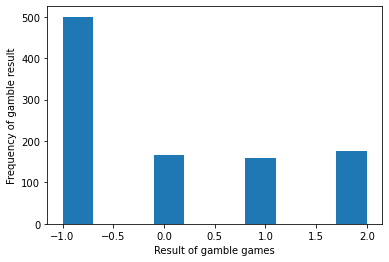

In [2]:
plt.hist(gamble_result)
plt.xlabel("Result of gamble games")
plt.ylabel("Frequency of gamble result")
plt.show()

## Normal & Continious Experiment 

Test results of some made up exam/test/whatever really <br>
This will be a normally distributed variable, and will be continious as test result could take on any value <br>
How much would it costs to pay people for good scores? <br> 

 - Using properties of Normal Distribution
 - We expect 99.7% of data within mean +- 3( std . dev)
 - So marks would be roughly within 0-100, using a mean of 50, and std of 15
 
Going to consider paying students for grades below:
 
 - If test result < 50 , get nothing
 - If test result is between 50 & 75 = 5
 - If test result is between 75 & 100 = 10
 
Going to run for 10,000 simulations 

Average test result: 49.963338314803025
Average cost per student for result:  2.749
Std Dev of test results: 15.22659310423451
Std Dev of cost: 0.9413830782417946


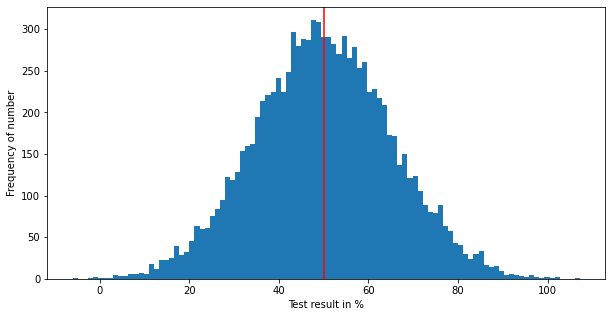

In [3]:
# number of iterations 
num_of_iters = 10000

# set a random seed
random.seed(42)

list_test_result = []
cost_result = []

# simulating for number of iterations  
for i in range(num_of_iters):
    
    cost_for_good_grade = 0
    
    # simulating test result for a student 
    test_result = random.normalvariate(50,15)
     
    if test_result < 50:
        cost_for_good_grade = cost_for_good_grade
        
    elif test_result >= 50 and test_result < 75 :
        cost_for_good_grade = 5
        
    else:
        cost_for_good_grade = 10
        
    # adding the test_result to a list 
    list_test_result.append(test_result)
    # adding the cost_result to a list 
    cost_result.append(cost_for_good_grade)
    
# this is for calculating the frequency/average expected outcome of the test results 
experiment_test_result = 0

# this is for calculating the frequency/average expected outcome of the cost 
experiment_cost_result = 0

for result in list_test_result:
    #summing up the entire test results, so then can calcualte the mean result (i.e expected outcome) 
    experiment_test_result += result

# expected value of test result is just the mean of the data 
avg_test_result = experiment_test_result / len(list_test_result) 

# we should expect the result to be close to 50, but doesnt have to be exactly 50 either due to randomness
print("Average test result:" , avg_test_result)

for res in cost_result:
    #summing up the entire test results, so then can calcualte the mean result (i.e expected outcome) 
    experiment_cost_result += res

# expected value of test result is just the mean of the data 
avg_cost_result = experiment_cost_result / len(cost_result) 

# here we will see what we would expect to pay out if we implmented paying for good grades
print("Average cost per student for result: " , avg_cost_result)


# this is for calculating part std . dev of test results 
x_test_subtract_mu_squared = 0
# this is for calculating part std . dev of cost
x_cost_subtract_mu_squared = 0

# this is for calculating part std . dev of test result
for result in list_test_result:
    x_test_subtract_mu_squared += (result - avg_test_result)**2
    
# this is for calculating part std . dev ofcost  
for cost_res in gamble_result:
    x_cost_subtract_mu_squared += (cost_res - avg_cost_result)**2

# calculating std dev of test results 
std_dev = ( (x_test_subtract_mu_squared /len(list_test_result) ) **(1/2))

# calculating std dev of cost results 
std_dev_cost = ( (x_cost_subtract_mu_squared /len(cost_result) ) **(1/2))


print("Std Dev of test results:" , std_dev)
print("Std Dev of cost:" , std_dev_cost)

# plot of distribution of summed result
plt.figure(figsize=(10,5))
plt.hist(list_test_result,bins = 100)

#this would be the expected mean for the normal distibution we created/sampled 
plt.axvline(x=50, color='r', linestyle='-')

plt.xlabel("Test result in %")
plt.ylabel("Frequency of number")
plt.show()

### Plot of cost 
We can see alot of the results were actually 0 & 5, and that 10 had a smaller frequency in comparison to the others, but the expected outcome of the cost of student is actually approx 2.749

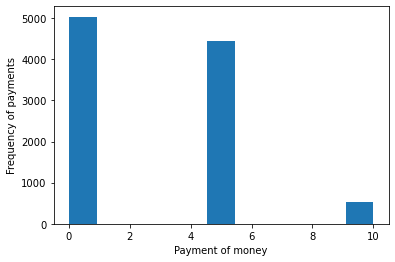

In [4]:
plt.hist(cost_result,bins = 11)
plt.xlabel("Payment of money")
plt.ylabel("Frequency of payments")
plt.show()